In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import torch                                                                                                                                                                                                       
import torchvision
import torch.nn as nn
import torch.utils.data as data
from sklearn import datasets
from torch.autograd import Variable

### Dataset creation

In [2]:
iris = datasets.load_iris()
X = torch.from_numpy(iris.data.astype('float32'))

y = torch.from_numpy(iris.target)

In [3]:
ds = data.TensorDataset(X, y)
data_loader = data.DataLoader(ds, batch_size=50,
                              shuffle=True,
                              num_workers=4)

### Classifier

In [4]:
class LogReg(nn.Module):
    def __init__(self, in_size, n_classes):
        super(LogReg, self).__init__()
        self.lin = nn.Linear(in_size, n_classes)
        self.bn = nn.BatchNorm1d(n_classes)

        
    def forward(self, X):
        out = self.lin(X)
        out = self.bn(out)
        return out
    
model = LogReg(X.size(1),3)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [5]:
%%time

n_epochs = 1000
accuracies = []

for epoch in range(n_epochs):
    if not (epoch % (n_epochs / 10)):
        print("Epoch {}".format(epoch))
        
    for (X_batch, y_batch) in data_loader:
        X_batch = Variable(X_batch)
        y_batch = Variable(y_batch)
        
        y_pred = model(X_batch)
        loss = loss_func(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, y_pred = torch.max(y_pred, 1)
        acc = torch.sum((y_pred == y_batch).data) / y_pred.size(0)
        accuracies.append(acc)

Epoch 0
Epoch 100
Epoch 200
Epoch 300
Epoch 400
Epoch 500
Epoch 600
Epoch 700
Epoch 800
Epoch 900
CPU times: user 38.4 s, sys: 3min 15s, total: 3min 54s
Wall time: 1min 15s


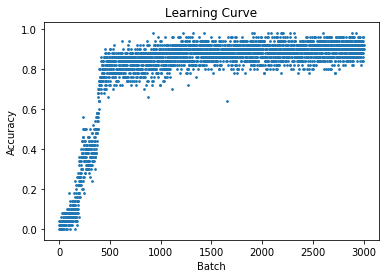

In [6]:
plt.title("Learning Curve")
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.scatter(np.linspace(1, len(accuracies), len(accuracies)), accuracies, s=3)
plt.show()